# Assignment 1

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
import ast
import random
from numpy import sqrt

In [2]:
authors = pd.read_csv('data/authors.csv')
papers = pd.read_csv('data/papers.csv')
# abstracts = pd.read_csv('data/final_abstracts.csv')
print('authors',authors.shape)
print('papers',papers.shape)

authors (14560, 8)
papers (146265, 4)


In [3]:
def preprocess_author_ids(row):
    try:
        return ast.literal_eval(row)
    except:
        return []
papers['author_ids'] = papers['author_ids'].apply(preprocess_author_ids)

def generateGraph(path_save_graph = './data/network.json'): 
    counts = {}
    for _, paper in papers.iterrows():
        for author_pair in combinations(paper['author_ids'], 2):
            sorted_pair = tuple(sorted(author_pair))
            counts[sorted_pair] = counts.get(sorted_pair, 0) + 1
    weighted_edgelist = [(pair[0], pair[1], weight) for pair, weight in counts.items()]

    G = nx.Graph()
    G.add_weighted_edges_from(weighted_edgelist)
    # Adding node attributes
    for _, row in authors.iterrows():
        # Node attributes
        node_attrs = {
            'display_name': row['display_name'],
            'country': row['country_code'],
            'citation_count': row['cited_by_count'],
            # Using 'works_count' as a proxy for the first publication year
            'first_publication_year': row['works_count']}
        G.add_node(row['id'], **node_attrs)
        
    # data = nx.readwrite.json_graph.node_link_data(G)

    nx.write_adjlist(G, path_save_graph)
    return G

In [4]:
# def generateGraph():
#     weighted_edgelist = {}

#     for author in papers['author_ids']:
#         for i in range(len(author)):
#             for j in range(i+1, len(author)):
#                 pair = tuple(sorted([author[i], author[j]]))
#                 if pair in weighted_edgelist:
#                     weighted_edgelist[pair] += 1
#                 else:
#                     weighted_edgelist[pair] = 1

#     weighted_edgelist = [(pair[0], pair[1], count) for pair, count in weighted_edgelist.items()]

#     G = nx.Graph()
#     G.add_weighted_edges_from(weighted_edgelist)
#     for node in G.nodes():
#         # Retrieve the author's display name, country, citation count, and year of first publication
#         display_name = authors.loc[authors['id'] == node, 'display_name']
#         country = authors.loc[authors['id'] == node, 'country_code']
#         citation_count = authors.loc[authors['id'] == node, 'works_count']
#         # first_publication_year = papers.loc[papers['author_id'].apply(lambda x: node in ast.literal_eval(x)), 'publication_year'].min()
        
#         # Add the attributes to the node
#         G.nodes[node]['display_name'] = display_name
#         G.nodes[node]['country'] = country
#         G.nodes[node]['citation_count'] = citation_count
#         # G.nodes[node]['first_publication_year'] = first_publication_year

#     # Save the network as a JSON file
#     nx.write_adjlist(G, './data/network.json')
#     return G

In [5]:
# True if you want to recreate the graph from scratch, False if you wanna use the already saved graph
recreateGraph = True 

if recreateGraph:
    Network = generateGraph('./data/network.json')
else:
    Network = nx.read_adjlist('./data/network.json')

## Part 1: Properties of the real-world network of Computational Social Scientists

1. **Random Network: Let's start by building a Random Network, acting as a baseline (or "null model") to understand the Computational Social Scientists Network better.**

**First, calculate the probability (p) that makes the expected number of edges in our random network match the actual edge count in the Computational Social Scientists network. Refer to equation 3.2 in your Network Science textbook for guidance. After finding p, figure out the average degree (using the given formula).**

In [6]:
# Calculate the probability (p)
number_of_nodes = len(Network.nodes)
number_of_edges = len(Network.edges)

p = (2 * number_of_edges) / (number_of_nodes * (number_of_nodes - 1))

# Calculate the average degree
average_degree = 2 * number_of_edges / number_of_nodes

print('The probability (p) is:', p)
print('The average degree is:', average_degree)

The probability (p) is: 3.903308449144554e-05
The average degree is: 7.360741974143325


**Now, write a function to generate a Random Network that mirrors the Computational Social Scientists network in terms of node count, using your calculated p. Generate a random network by linking nodes in every possible pair with probability p.**

In [7]:
RandomNetwork = nx.fast_gnp_random_graph(number_of_nodes, p)

**Visualize the network as you did for the Computational Social Scientists network in the exercise above**

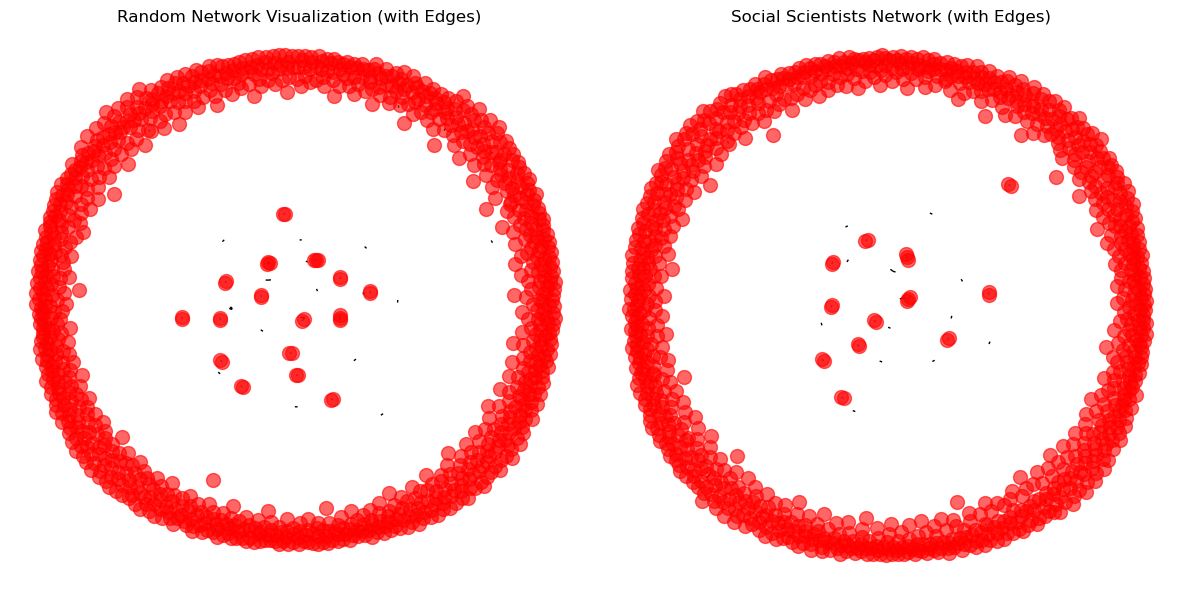

In [8]:
# Printing a representative subsample to make the comparisons of the two graphs much more efficient and faster
num_nodes = 1000

# Convert the set of nodes to a list before sampling
network_sample = random.sample(list(Network.nodes), num_nodes)
network_subgraph = Network.subgraph(network_sample)

random_network_sample = random.sample(list(RandomNetwork.nodes), num_nodes)
random_network_subgraph = RandomNetwork.subgraph(random_network_sample)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].set_title('Random Network Visualization')
nx.draw(network_subgraph, with_labels=False, node_color='red', edge_color='black', alpha=0.6, node_size=100, ax=axs[0])

# Plot the second subplot
axs[1].set_title('Social Scientists Network')
nx.draw(random_network_subgraph, with_labels=False, node_color='red', edge_color='black', alpha=0.6, node_size=100, ax=axs[1])

# Print the edges
axs[0].set_title('Random Network Visualization (with Edges)')
nx.draw_networkx_edges(network_subgraph, pos=nx.spring_layout(network_subgraph), ax=axs[0])

axs[1].set_title('Social Scientists Network (with Edges)')
nx.draw_networkx_edges(random_network_subgraph, pos=nx.spring_layout(random_network_subgraph), ax=axs[1])

plt.tight_layout()
plt.savefig('./data/network_comparison.png')
plt.show()

In [9]:
# # To slow to print all the nodes

# fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# # Plot the first subplot
# axs[0].set_title('Random Network Visualization')
# nx.draw(Network, with_labels=False, node_color='lightblue', edge_color='gray', node_size=200, ax=axs[0])

# # Plot the second subplot
# axs[1].set_title('Social Scientists Network')
# nx.draw(RandomNetwork, with_labels=False, node_color='lightblue', edge_color='gray', node_size=200, ax=axs[1])


# plt.tight_layout()
# plt.show()


In [10]:
average_degree = sum(dict(RandomNetwork.degree()).values()) / number_of_nodes

print("Number of Nodes:", number_of_nodes)
print("Probability of Edge Creation (p):", p)
print("Average Degree:", average_degree)

# Example critical threshold for Erdős-Rényi model
critical_threshold_er = 1
if average_degree > critical_threshold_er:
    print("The random network falls into the supercritical regime.")
elif average_degree < critical_threshold_er:
    print("The random network falls into the subcritical regime.")
else:
    print("The random network is at the critical threshold.")

Number of Nodes: 188578
Probability of Edge Creation (p): 3.903308449144554e-05
Average Degree: 7.356213344080434
The random network falls into the supercritical regime.


**What regime does your random network fall into? Is it above or below the critical threshold?**

To determine the regime of the random network, we need to compare the average degree of the network with the critical threshold. If the average degree is above the critical threshold, the network falls into the supercritical regime. If the average degree is below the critica 

In this case, the average degree of the random network is 7.356, which is above the critical threshold. Therefore, the random network falls into the supercritical regime.

**According to the textbook, what does the network's structure resemble in this regime?**

In the supercritical regime, where the average degree of the network exceeds the critical threshold, the network's structure typically resembles that of a "dense" network. This means that most nodes in the network are connected to a significant portion of other nodes, resulting in a high level of interconnectedness. It can be also said that the network's structure resembles a small-world network.

**Based on your visualizations, identify the key differences between the actual and the random networks. Explain whether these differences are consistent with theoretical expectations.**

- Degree Distribution: The degree distribution of actual network differ from that of random networks. Computer Science network have degree distributions that follow a power-law distribution, indicating the presence of highly connected hubs or nodes with many connections. Random network, on the other hand, have a Poisson degree distributions, where most nodes have a similar number of connections.

- Clustering coefficient: Computer Science network exhibit higher clustering coefficients compared to the random network. This means that nodes in real network tend to form tightly-knit clusters or communities, where nodes are more likely to be connected to each other if they share neighbors. 

- Small-World Properties: Computer Science networks exhibit small-world properties, characterized by short average path lengths and high clustering coefficients. While random networks can also exhibit small-world properties, the specific combination of short path lengths and high clustering observed in actual networks is often indicative of underlying network structure and organization. T

2. **Degree Distribution: This section focuses on analyzing the degree distribution of both the actual Computational Social Scientists network and its random counterpart.**

Compute the distribution of degree for the random network using the numpy function np.histogram. Choose bins, and normalization strategies appropriately.

Degree Distribution:
Bin 1: 0.009553959988263036
Bin 2: 0.05022678502617839
Bin 3: 0.16734233756500408
Bin 4: 0.10283543149253888
Bin 5: 0.05716688408333244
Bin 6: 0.02602150480614566
Bin 7: 0.0027906224480055974
Bin 8: 0.0006871603969356626
Bin 9: 3.314278441811878e-05
Bin 10: 8.838075844831662e-06


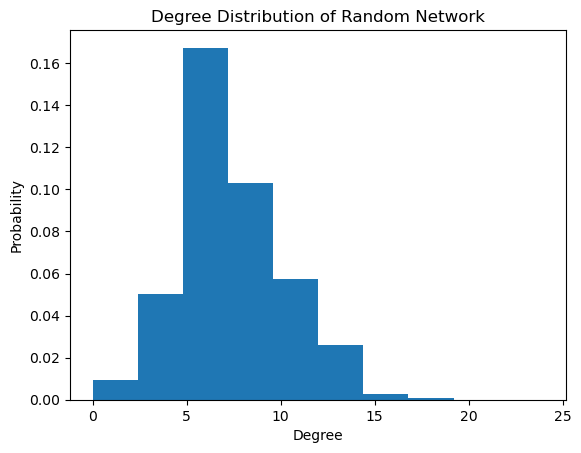

In [11]:
# Get the degree values of the nodes in the random network
degree_values = [degree for node, degree in RandomNetwork.degree()]

# Compute the degree distribution using np.histogram
hist, bins = np.histogram(degree_values, bins=10, density=True)

# Print the degree distribution
print("Degree Distribution:")
for i in range(len(hist)):
    print(f"Bin {i+1}: {hist[i]}")

# Plot the degree distribution
plt.bar(bins[:-1], hist, width=np.diff(bins), align='edge')
plt.xlabel("Degree")
plt.ylabel("Probability")
plt.title("Degree Distribution of Random Network")
plt.show()


Degree Distribution:
Bin 1: 0.015026788034065737
Bin 2: 8.214998183153674e-05
Bin 3: 1.46811002687219e-05
Bin 4: 3.048534482029684e-06
Bin 5: 1.363818057750121e-06
Bin 6: 4.011229581618007e-07
Bin 7: 8.022459163236013e-08
Bin 8: 0.0
Bin 9: 0.0
Bin 10: 8.022459163236006e-08


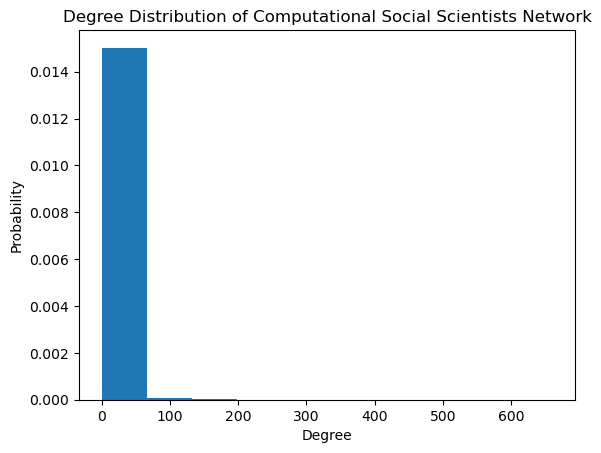

In [12]:
# Get the degree values of the nodes in the Computational Social Scientists network
degree_values = [degree for node, degree in Network.degree()]

# Compute the degree distribution using np.histogram
hist, bins = np.histogram(degree_values, bins=10, density=True)

# Print the degree distribution
print("Degree Distribution:")
for i in range(len(hist)):
    print(f"Bin {i+1}: {hist[i]}")

# Plot the degree distribution
plt.bar(bins[:-1], hist, width=np.diff(bins), align='edge')
plt.xlabel("Degree")
plt.ylabel("Probability")
plt.title("Degree Distribution of Computational Social Scientists Network")
plt.show()


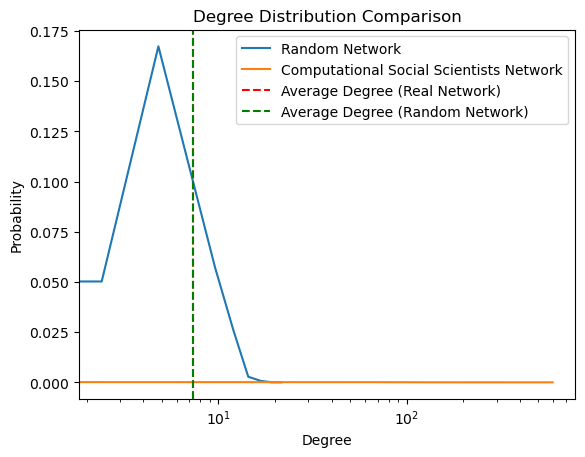

In [13]:
# Get the degree values of the nodes in the random network
random_degree_values = [degree for node, degree in RandomNetwork.degree()]
random_hist, random_bins = np.histogram(random_degree_values, bins=10, density=True)

# Get the degree values of the nodes in the Computational Social Scientists network
network_degree_values = [degree for node, degree in Network.degree()]
network_hist, network_bins = np.histogram(network_degree_values, bins=10, density=True)

plt.xscale('log')
# Plot the degree distributions
plt.plot(random_bins[:-1], random_hist, label='Random Network')
plt.plot(network_bins[:-1], network_hist, label='Computational Social Scientists Network')

# Add vertical lines for average degree
plt.axvline(x=average_degree, color='red', linestyle='--', label='Average Degree (Real Network)')
plt.axvline(x=np.mean(random_degree_values), color='green', linestyle='--', label='Average Degree (Random Network)')


plt.xlabel("Degree")
plt.ylabel("Probability")
plt.title("Degree Distribution Comparison")
plt.legend()
plt.show()


**Does the average degree meaningfully represents the network's characteristics, especially in light of the insights gained from exploring heavy-tailed distributions? Discuss its adequacy or limitations in capturing the essence of the network's structural properties.**

**What differences can you observe between the real and the random distributions? How does the shape of the degree distribution for each network inform us about the network's properties?**

---

## Part 2 Network Analysis in Computational Social Science


__Part 1: Assortativity Coefficient__ 
1. *Calculate the Assortativity Coefficient* for the network based on the country of each node. Implement the calculation using the formula provided during the lecture, also available in [this paper](https://arxiv.org/pdf/cond-mat/0209450.pdf) (equation 2, here for directed networks). **Do not use the NetworkX implementation.**

In [14]:
def assortativity(G):
    total_edges = G.number_of_edges()
    country_edge = {}
    for edge in G.edges(data=True):
        country1 = G.nodes[edge[0]].get('country')
        country2 = G.nodes[edge[1]].get('country')
        if country1 == country2:
            country_edge[country1] = country_edge.get(country1, 0) + 1
    sum_eii = sum(value / total_edges for value in country_edge.values())
    sum_ai = sum((value / total_edges)**2 for value in country_edge.values())
    assortativity_coefficient = (sum_eii - sum_ai) / (1 - sum_ai)
    return assortativity_coefficient

In [15]:
assortativity_coefficient = assortativity(Network)
print("The assortativity coefficient is", assortativity_coefficient)

The assortativity coefficient is 0.41376729406391355


__Part 2: Configuration model__

In [16]:
def double_edge_swap(original_network):
    total_edges = Network.number_of_edges()
    new_network = Network.copy()
    swap_counts = total_edges * 10
    n = 0
    edges = list(new_network.edges())
    for _ in range(swap_counts):
        e1,e2 = random.sample(edges,2)
        u,v = e1
        x,y = e2
        if u!= y and v!=x:
            if random.random()<= 0.5:
                # u,v = v,u
                e1 = (v,u)
        # if not G.has_edge(u,y) and not G.has_edge(x,v):
        if not Network.has_edge(e1[0],e2[1]) and not Network.has_edge(e2[0],e1[1]):
            new_e1 = (e1[0],e2[1])
            new_e2 = (e2[0],e1[1])
            new_network.remove_edges_from([e1,e2])
            new_network.add_edges_from([new_e1,new_e2])
            # edges.remove((u,v))
            # edges.remove(e2)
            # edges.append(new_e1)
            # edges.append(new_e2)
    
    # while n in range(swap_counts):
    #     e1,e2 = random.sample(edges,2)
    #     # e1,e2 = random.sample([*new_network.edges()], 2)
    #     u,v = e1
    #     x,y = e2
    #     if u!= y and v!=x:
    #         if random.random()<= 0.5:
    #             # u,v = v,u
    #             e1 = (v,u)
    #     # if not G.has_edge(u,y) and not G.has_edge(x,v):
    #     if not Network.has_edge(e1[0],e2[1]) and not Network.has_edge(e2[0],e1[1]):
    #         new_e1 = (e1[0],e2[1])
    #         new_e2 = (e2[0],e1[1])
    #         new_network.remove_edges_from([e1,e2])
    #         new_network.add_edges_from([new_e1,new_e2])
    #         # edges.remove((u,v))
    #         # edges.remove(e2)
    #         # edges.append(new_e1)
    #         # edges.append(new_e2)
    #     n += 1
    return new_network

In [17]:
degree = len(Network.degree())
print("The degree of original network:", degree)

The degree of original network: 188578


In [18]:
d1 = len(double_edge_swap(Network))
print("The degree of random network:", d1)

The degree of random network: 188578


__Part 3: Analyzing Assortativity in Random Networks__ 

4. *Generate and analyze at least 100 random networks* using the configuration model. For each, calculate the assortativity with respect to the country and plot the distribution of these values. Compare the results with the assortativity of your original network to determine if connections within the same country are significantly higher than chance."

In [ ]:
assortativity_list = []
# m = 0
# while m in range(100):
#     random_network = double_edge_swap(Network)
#     assortativity_value = assortativity(random_network)
#     assortativity_list.append(assortativity_value)

for _ in range(100):
    random_network = double_edge_swap(Network)
    assortativity_value = assortativity(random_network)
    assortativity_list.append(assortativity_value)

plt.hist(assortativity_list, bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Assortativity Coefficient')
plt.ylabel('Frequency')
plt.title('Distribution of Assortativity Coefficients for 100 Random Networks')
plt.show()

__Part 4: Assortativity by Degree__

5. *Calculate degree assortativity* for your network using the formula discussed in the lecture.

In [25]:
def degree_assortativity(network):
    total_edges = Network.number_of_edges()
    ku_total = 0
    kv_total = 0
    kukv_total = 0
    ku_s_total = 0
    kv_s_total = 0
    for u,v in network.edges():
        ku = network.degree(u)
        kv = network.degree(v)
        ku_total += ku
        kv_total += kv
        kukv_total += ku * kv
        ku_s_total += ku ** 2
        kv_s_total += kv ** 2
    avg_ku = ku_total/total_edges
    avg_kv = kv_total/total_edges
    avg_kukv = kukv_total/total_edges
    avg_ku_s = ku_s_total/total_edges
    avg_kv_s = kv_s_total/total_edges

    if avg_ku_s-avg_ku**2 <= 0 or avg_kv_s-avg_kv**2 <= 0:
        return None
    assortativity = (avg_kukv-avg_ku*avg_kv)/(sqrt(avg_ku_s-avg_ku**2)*sqrt(avg_kv_s-avg_kv**2))
    return assortativity

In [26]:
degree_a = degree_assortativity(Network)
print("The degree_assortativity is", degree_a)

The degree_assortativity is 0.05588038482166619


6. *Compare your network's degree assortativity* against that of 100 random networks generated via the configuration model. Analyze whether your network shows a tendency for high-degree scientists to connect with other high-degree scientists and vice versa. 

In [ ]:
degree_list = []
# n = 0
# while n in range(100):
for _ in range(100):
    random_network = double_edge_swap(Network)
    assortativity_degree = degree_assortativity(random_network)
    degree_list.append(assortativity_degree)
plt.hist(degree_list, bins=20, color='skyblue', edgecolor='black')
plt.axvline(x=degree_a, color='red', linewidth=2)
plt.xlabel('Degree Assortativity Coefficient')
plt.ylabel('Frequency')
plt.title('Degree Assortativity: Original vs Random Networks')
plt.show()

 __Part 5: Reflection questions (max 250 words for the 3 questions)__ 
 
 7. *Assortativity by degree.* Were the results of the degree assortativity in line with your expectations? Why or why not?

The assortativity be the degree $r$ is around $0.056$, which between $0$ and $1$, the nodes are tend to connect with other nodes which degree are in similiar level, indicating there indeed exists a slight positive correlation. Therefore, the assortativity is in satisfied with the expections.


8. *Edge flipping.* In the process of implementing the configuration model, you were instructed to flip the edges (e.g., changing *e_1* from (u,v) to (v,u)) 50% of the time. Why do you think this step is included?

To set the probability of the changes of edges can avoid the bias of the selection.Morever, it can ensure the edges is uniform and ensure the randomization of graph degree.

9. *Distribution of assortativity in random networks.* Describe the distribution of degree assortativity values you observed for the random networks. Was the distribution pattern expected? Discuss how the nature of random network generation (specifically, the configuration model and edge flipping) might influence this distribution and whether it aligns with theoretical expectations.

In [ ]:
closeness_centrality = nx.closeness_centrality(Network)
sorted_closeness_centrality = sorted(closeness_centralities.items(), key=lambda x: x[1], reverse=True)
top5 = sorted_closeness_centrality[:5]
top5

* Find the 5 most central scientists according to eigenvector centrality.>

In [88]:
eigenvector_centrality = nx.eigenvector_centrality(Network)
sorted_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)
top_5_eigenvector = sorted_eigenvector[:5]
top_5_eigenvector

[('https://openalex.org/A5086852785', 0.44349397136359864),
 ('https://openalex.org/A5026197656', 0.29213954233037837),
 ('https://openalex.org/A5023888505', 0.14956022880024802),
 ('https://openalex.org/A5016719332', 0.13289122120682137),
 ('https://openalex.org/A5039652993', 0.12794424042736877)]

* Plot the closeness centrality of nodes vs their degree. Is there a correlation between the two? Did you expect that? Why? 

In [ ]:
degrees = dict(Network.degree())
closeness = list(closeness_centrality.values())
degree_value = [degrees[node] for node in closeness_centrality]
plt.scatter(degree_value, closeness, color='green')
plt.xlabel('Degree')
plt.ylabel('Closeness Centrality')
plt.title('Closeness Centrality vs Degree')
plt.show()

According to scatter plot it shows very slight correlation between the two, not as clear as my expect. This is because a node is likely to have many neighbors but still be far from other parts of the network.

* Repeat the two points above using eigenvector centrality instead. Do you observe any difference? Why?

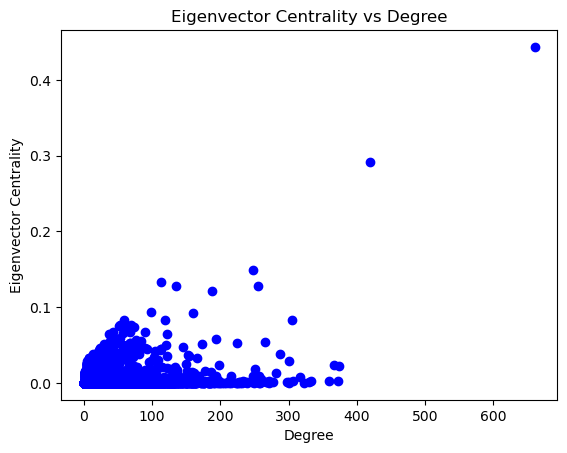

In [89]:
eigenvector_value = list(eigenvector_centrality.values())
degree_value_e = [degrees[node] for node in eigenvector_centrality]
# plt.figure(figsize=(10, 6))
plt.scatter(degree_value_e, eigenvector_value, color='blue')
plt.xlabel('Degree')
plt.ylabel('Eigenvector Centrality')
plt.title('Eigenvector Centrality vs Degree')
plt.show()

## Part 3 - Words that characterize Computational Social Science communities

__Exercise 1 Explain TF-IDF in your own words?__

TF stands for term frequency, and IDF stands for inverse document frequency. It is a weighting factor that puts weights on different words based on how they important they are for a document. The TF-IDF takes in account how frequent a word appears in a document. The term frequency tf(t, d) is the relative frequency of term t within document d. The inverse document frequency idf(t, D) is a measure of how much information the word t provides, based on how frequently or rare it is used accross all documents D. The TF-IDF is then a product of the term frequency and the inverse document frequency.

In [ ]:
import community
import matplotlib.cm as cm

Apply the Louvain algorithm
partition = community.best_partition(G)

In [ ]:
community_i_authors = {}
for author, community in partition.items():
    if community == i:
        if community not in community_i_authors:
            community_i_authors[community] = []
        community_i_authors[community].append(author)

In [ ]:
import requests
# Create an empty list to store the abstracts for each community
abstracts = []
URL_W = "https://api.openalex.org/works"
selected_vars = 'abstract_inverted_index'
# Iterate over the community_i_authors dictionary
for community, authors in community_i_authors.items():
    # Make a request to get the abstracts for all the authors in the current community
        def_results = []
        community_abstracts = []
        response = requests.get(URL_W, params={'filter': ,
                                               'select': selected_vars, 'per-page': '200', 'page': str(i)})
        if response.status_code == 200:
            author_abstracts = response.json()
            community_abstracts.append(author_abstracts)
        community_abstracts.append(abstracts)